# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## **Actividad de las Semanas 5 y 6**
### **Problema de asignación de créditos: South German Dataset.**


## **Nombres y matrículas:**



*   Marcelo Ismael López Verdugo A00959089 

*   Nombre y matrícula

*   Nombre y matrícula



## **Ejercicio 1**

In [64]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import make_scorer, roc_curve, RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay
from imblearn.metrics import geometric_mean_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, cross_validate
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC


In [3]:
# Verificando versiones de algunas de las principales librerías.
# Si algunas no se utilizan, puedes comentarlas.
tmp = !python -V
print(tmp[0])
print('Numpy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', matplotlib.__version__)
print('Seaborn', sns.__version__)
print('Scikit-Learn', sklearn.__version__)
print('XGBoost', xgboost.__version__)

# puedes incluir algunas otras ...


Python 3.12.1
Numpy 2.2.0
Pandas 2.2.3
Matplotlib 3.9.3
Seaborn 0.13.2
Scikit-Learn 1.6.0
XGBoost 2.1.4


In [ ]:
# Si deseas desplegar los Warnings:
#import warnings
#warnings.filterwarnings('ignore')

In [4]:
# Carga los datos del archivo SouthGermanCredit.asc:

# ************* Inlcuye aquí tu código:*****************************


None   # NOTA: Tanto aquí como en lo sucesivo, "None" puede indicar una o varias líneas de código.
df=pd.read_csv('SouthGermanCredit.asc',delimiter=" ")


# *********** Aquí termina la sección de agregar código *************


print('Dimensión del DataFrame (registros,variables):', df.shape)
df.head(3).T

Dimensión del DataFrame (registros,variables): (1000, 21)


,0,1,2
laufkont,1,1,2
laufzeit,18,9,12
moral,4,4,2
verw,2,0,9
hoehe,1049,2799,841
sparkont,1,1,2
beszeit,2,3,4
rate,4,2,2
famges,2,3,2
buerge,1,1,1


In [5]:
# Renombra las columnas del alemán al inglés y desplegamos de
# nuevo el DataFrame para ver el resultado obtenido:

# ************* Inlcuye aquí tu código:*****************************


None   # NOTA: Tanto aquí como en lo sucesivo, "None" puede indicar una o varias líneas de código.
#columns=['running account', 'duration', 'moral', 'used', 'height', 'savings account', 'time', 'rate', 'famges']
columns_eng=['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration',
              'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age',
              'other_installment_plans', 'housing','number_credits','job','people_liable','telephone','foreign_worker',
              'credit_risk']
df.columns=columns_eng

# *********** Aquí termina la sección de agregar código *************


df.head(3).T

,0,1,2
status,1,1,2
duration,18,9,12
credit_history,4,4,2
purpose,2,0,9
amount,1049,2799,841
savings,1,1,2
employment_duration,2,3,4
installment_rate,4,2,2
personal_status_sex,2,3,2
other_debtors,1,1,1


## **Ejercicio 2**

In [6]:
# De la documentación de los datos SouthGermandata se sabe que la clase mayoritaria
# de los buenos clientes se etiquetó con el valor de 1 en la variable de salida
# llamada "credit_risk".
# Veamos:

print(df['credit_risk'].value_counts())

credit_risk
1    700
0    300
Name: count, dtype: int64


In [7]:
# Por lo tanto, realiza a continuación una transformación para que la clase mayoritaria
# sea la clase negativa (es decir, de valor 0) y que la clase minoritaria sea la
# clase positiva (es decir, de valor 1).

# ************* Inlcuye aquí tu código:*****************************


df['credit_risk']=(-1)*((df['credit_risk'])-1)


# *********** Aquí termina la sección de agregar código *************


print(df['credit_risk'].value_counts())

credit_risk
0    700
1    300
Name: count, dtype: int64


## **Ejercicio 3**

In [8]:
# Ejercicio 3a.
# Realiza una partición con el porcentaje solicitado para entrenamiento y prueba.
# Los nombres de los conjuntos deberán ser como se indican en los print de abajo:

# ************* Inlcuye aquí tu código:*****************************

X,y = df.iloc[:,:-1], df.iloc[:,-1]

Xtrain, Xtest, ytrain, ytest=train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True,random_state=0)


# *********** Aquí termina la sección de agregar código *************


# Mostremos las dimensiones de la partición generada:
print("Dimensiones:")
print("Entrenamiento:", Xtrain.shape, ytrain.shape)
print("Prueba:", Xtest.shape, ytest.shape)

# Y el porcentaje de cada clase de la variable de salida:
tmp = (ytrain.sum()/ytrain.shape[0])#.iloc[0]
print("\nPorcentaje clases Positiva:%.2f%%, y Negativa:%.2f%%" % (100*(1-tmp),tmp*100))


Dimensiones:
Entrenamiento: (800, 20) (800,)
Prueba: (200, 20) (200,)

Porcentaje clases Positiva:70.00%, y Negativa:30.00%


### **Ejercicio 3b**
### **Con base al porcentaje de los niveles de la variable de salida ¿podemos decir que tenemos un problema de datos desbalanceado? ¿Por qué?**



### ++++++++ Inicia la sección de agregar texto: +++++++++++

Cierta literatura establece el umbral de desbalanceo a partir de una relación 80:20 y puesto que estas clases están en una relación 70:30 podríamos decir que **no** es un problema de desbalance.  
Al abordar esta problemática conviene evaluar la criticidad de una clasificación incorrecta en detectar adecuadamente los verdaderos positivos.  Si la matriz de confusión no beneficiara en la precisión, quizá convenga replantear a un enfoque de clases desbalanceadas pero de entrada el primer enfoque debería ser un clasificador normal.

### ++++++++ Termina la sección de agregar texto: +++++++++++



### **Ejercicio 3c**
### **¿Por qué se hizo el cambio de etiquetas 0 y 1 en la variable de salida?**



### ++++++++ Inicia la sección de agregar texto: +++++++++++

Las detecciones positivas son aquellas que se asocian a la anomalía en las pruebas de hipótesis, es por ello que usualmente se reserva el **1** o el **positivo** a la detección de la misma.  Para un sistema crediticio conviene enfocarse en encontrar dichos positivos para evitar otorgar un crédito a un cliente de alto riesgo.  Las métricas relacionadas a los positivos (precision and recall) son herramientas de optimización que directamente ayudan al tener como clase positiva a la minoritaria.

### ++++++++ Termina la sección de agregar texto: +++++++++++


## **Ejercicio 4**

In [9]:
# De acuerdo a la información de la Tabla 3 del artículo de la IEEE asociado a
# esta Actividad, define a continuación las variables de entrada correspondientes
# de acuerdo a su tipo y como se indica a continuación:

# ************* Inlcuye aquí tu código:*****************************

# Variables numéricas:
lista_paper_num = ['duration','amount','age']


# Variables ordinales:
lista_paper_ord = ['status','credit_history','savings','employment_duration','installment_rate', 
                   'present_residence','property','housing','number_credits','job','people_liable']


# Variables nominales & binarias:
lista_paper_cat = ['purpose','personal_status_sex','other_debtors','other_installment_plans','telephone','foreign_worker']



# *********** Aquí termina la sección de agregar código *************

print("Para los datos de entrada, veamos la cantidad de cada tipo de variable obtenida:")
print("Variables numéricas:", len(lista_paper_num))
print("Variables ordinales:", len(lista_paper_ord))
print("Variables nominales & binarias:", len(lista_paper_cat))


Para los datos de entrada, veamos la cantidad de cada tipo de variable obtenida:
Variables numéricas: 3
Variables ordinales: 11
Variables nominales & binarias: 6


## **Ejercicio 5**

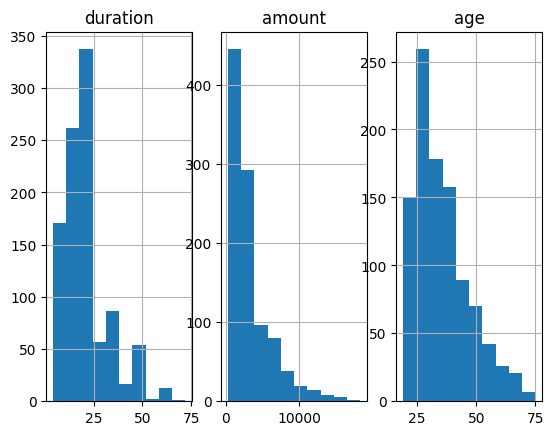

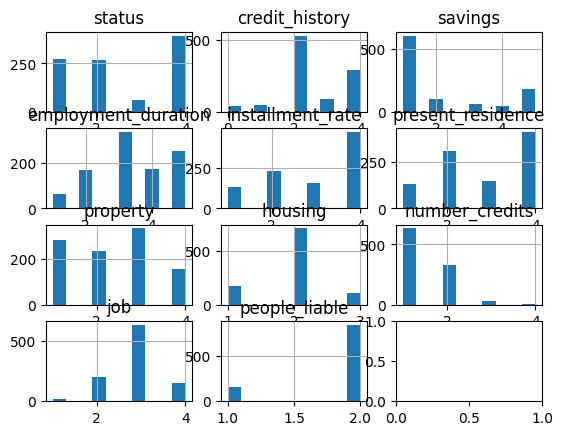

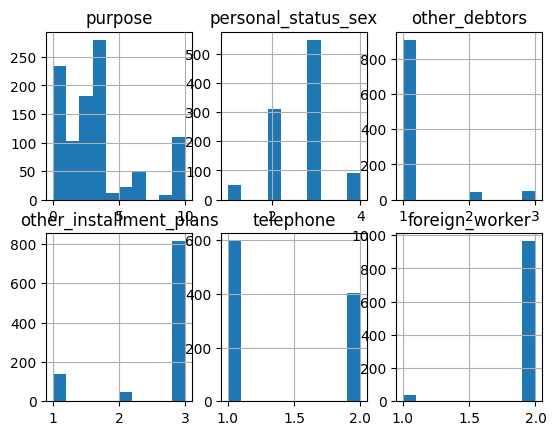

In [10]:
# En esta sección puedes incluir todas las celdas que consideres necesarias para
# visualizar o bien obtener información de cada tipo de variable y te ayude a
# determinar qué transformaciones aplicarás a cada una en el módulo de Pipeline.

sz=int(np.ceil(len(lista_paper_num)/3))
plt.subplots(sz,3)
k=1
for col in lista_paper_num:
    plt.subplot(sz,3,k)
    plt.title(col)
    df[col].hist()
    k+=1


sz=int(np.ceil(len(lista_paper_ord)/3))
plt.subplots(sz,3)
k=1
for col in lista_paper_ord:
    plt.subplot(sz,3,k)
    plt.title(col)
    df[col].hist()
    k+=1

sz=int(np.ceil(len(lista_paper_cat)/3))
plt.subplots(sz,3)
k=1
for col in lista_paper_cat:
    plt.subplot(sz,3,k)
    plt.title(col)
    df[col].hist()
    k+=1




In [11]:
# Una vez analizados los datos de entrada, las transformaciones que se aplicarán
# a cada tipo de variable usando la clase Pipeline de sklearn son las siguientes:


# ************* Inlcuye aquí tu código:*****************************

# Variables numéricas:
numericas_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='mean')),
                                       ('minmax_transformer', MinMaxScaler())])
numericas_pipeline_nombres = lista_paper_num


# Nota mental, es posible que las variables ordinales requieran el mismo escalamiento, mientras que las nominales serán 
# exclusivamente one-hot

# Variables categóricas-Nominales:
nominales_pipe = Pipeline(steps = [('OneHotE', OneHotEncoder(handle_unknown='ignore', drop='first'))])
nominales_pipe_nombres = lista_paper_cat


# Variables categóricas-ordinales:
ordinales_pipe = Pipeline(steps = [('impMediana', SimpleImputer(strategy='most_frequent')),
                                       ('minmax_transformer', MinMaxScaler())])
ordinales_pipe_nombres = lista_paper_ord




# Conjuntas las transformaciones de todo tipo de variable y
# deja sin procesar aquellas que hayas decidido no transformar:

columnasTransformer = ColumnTransformer(transformers = [('num', numericas_pipeline, numericas_pipeline_nombres),
                                                        ('nom',nominales_pipe,nominales_pipe_nombres),
                                                        ('ord',ordinales_pipe,ordinales_pipe_nombres)],
                                                        remainder='passthrough')




# *********** Aquí termina la sección de agregar código *************



Xtmp = Xtrain.copy()
tmp = columnasTransformer.fit_transform(Xtmp)
print("Dimensión de los datos de entrada:")
print("antes de aplicar las transformaciones:", Xtmp.shape)
print("después de aplicar las transformaciones:", tmp.shape)


Dimensión de los datos de entrada:
antes de aplicar las transformaciones: (800, 20)
después de aplicar las transformaciones: (800, 32)


## **Ejercicio 6**

In [12]:
# Como se va a utilizar Validación-Cruzada, concatena los conjuntos de entrenamiento
# y prueba en uno nuevo conjunto aumentado que llamaremos trainval:


# ************* Inlcuye aquí tu código:**************************


Xtraintest = pd.concat([Xtrain,Xtest],ignore_index=True)
ytraintest = pd.concat([ytrain,ytest],ignore_index=True)


# *********** Aquí termina la sección de agregar código *************


# Veamos cuántas variables nuevas se introducen con las transformaciones One-Hot-Encoding:
Xtmp = Xtraintest.copy()
tmp = columnasTransformer.fit_transform(Xtmp)
print("Dimensión de las variables de entrada ANTES de las transformaciones:", Xtmp.shape)
print("Dimensión de las variables de entrada DESPUÉS de las transformaciones:", tmp.shape)

Dimensión de las variables de entrada ANTES de las transformaciones: (1000, 20)
Dimensión de las variables de entrada DESPUÉS de las transformaciones: (1000, 32)


## **Ejercicio 7**

In [ ]:
# Definimos una función que evaluará cada modelo con diferentes tipos de métricas,
# así como incluyendo algún método de submuestreo o sobremuestreo.

def mi_fun(modelo, nombre, Xtraintest, ytraintest, metodo_uo=None):
        modelos, nombres = list(), list()

 #       modelos.append(LogisticRegression(max_iter=100,# 10, 100, 1000
 #                                   C = 1.0,     # 0.000001, 0.005, 0.01,  1000
 #                                   #random_state=1
 #                                   ))
 #       nombres.append('LR')
 #       
        
#        modelos.append(KNeighborsClassifier(n_neighbors = 5,     # 1, 5, 21, 201
#                                      ))
#        nombres.append('kNN')
#        
#        modelos.append(DecisionTreeClassifier(max_depth = None,       # None, 5, 3, 1
#                                        min_samples_split=2,
#                                     ))
#        nombres.append('DTree')
#        
#        modelos.append(RandomForestClassifier(n_estimators= 100,    # 100
#                                        max_depth= None,      # None, 1, 2,3, 4, 5, 6 ... ¿Se esperaría la misma profunidad en un RF y en un DT?
#                                        min_samples_split=2,    # 2, 5, 15
#                                        #random_state=0
#                                        ))
#        nombres.append('RF')

        pipeline = ImbPipeline(steps=[
            ('preprocesamiento',columnasTransformer),
            ('sub_sobre_muestreo', metodo_uo),
            ('model', modelo)
        ])

        """
        Se lleva a cabo el proceso de entrenamiento y evaluación
        con diferentes métricas.
        Args:
             modelo: modelo con la configuración deseada
             nombre: nombre del modelo
             Xtriantest, ytraintest: Variables de entrada y variable de salida
             mod_uo: método de submuestreo o sobremuestreo, si aplica.
        """

        micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=5)
        mismetricas = {
            'miaccuracy': 'accuracy',
            'miprecision': 'precision',
            'mirecall': 'recall',
            'mifi': 'f1',
            'miauc': 'roc_auc',
            'migmean': make_scorer(geometric_mean_score)
        }

        scores = cross_validate(pipeline, Xtraintest, np.ravel(ytraintest), scoring=mismetricas, cv=micv, return_train_score=True)

        print('>> %s' % nombre)
        for j, k in enumerate(list(scores.keys())):
            if j > 1:
                print('\t %s %.4f (%.3f)' % (k, np.nanmean(scores[k]), np.nanstd(scores[k])))



### **Ejercicio 7a: Regresión Logística**

In [66]:
# Regresión Logística - Logistic Regression-LR:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# Puedes consultar la siguiente liga para los métodos de submuestreo o sobremuestreo:
# https://imbalanced-learn.org/stable/references/over_sampling.html

# ************* Inlcuye aquí tu código:**************************

nombre = "Regresión_Logística"

# Selecciona la configuración de valores de hiperparámetros que consideres
# te da el mejor desempeño:
modelo = LogisticRegression(penalty='l2',
                            max_iter=2000,
                            random_state=1)

# Selecciona el método de submuestreo o sobremuestreo, si lo deseas incluir.
metodo_uo=RandomUnderSampler()


# *********** Aquí termina la sección de agregar código *************


# Evaluemos la configuración seleccionada:
mi_fun(modelo,nombre, Xtraintest, ytraintest, metodo_uo)


>> Regresión_Logística
	 test_miaccuracy 0.7170 (0.023)
	 train_miaccuracy 0.7429 (0.009)
	 test_miprecision 0.5208 (0.028)
	 train_miprecision 0.5518 (0.012)
	 test_mirecall 0.7156 (0.054)
	 train_mirecall 0.7650 (0.010)
	 test_mifi 0.6023 (0.034)
	 train_mifi 0.6411 (0.009)
	 test_miauc 0.7868 (0.027)
	 train_miauc 0.8200 (0.006)
	 test_migmean 0.7159 (0.029)
	 train_migmean 0.7490 (0.008)


### **Ejercicio 7b: k-Vecinos Más Cercanos (kNN)**

In [68]:
# k-Vecinos más Cercanos : k-Nearest-Neighbors-kNN:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


# ************* Inlcuye aquí tu código:**************************

nombre = 'kNN'
modelo = KNeighborsClassifier(n_neighbors = 15)
metodo_uo = RandomUnderSampler()

# *********** Aquí termina la sección de agregar código *************


# Evaluemos la configuración seleccionada:
mi_fun(modelo, nombre, Xtraintest, ytraintest, metodo_uo)


>> kNN
	 test_miaccuracy 0.6553 (0.026)
	 train_miaccuracy 0.6867 (0.015)
	 test_miprecision 0.4543 (0.027)
	 train_miprecision 0.4861 (0.016)
	 test_mirecall 0.7089 (0.060)
	 train_mirecall 0.7550 (0.019)
	 test_mifi 0.5521 (0.024)
	 train_mifi 0.5913 (0.014)
	 test_miauc 0.7306 (0.028)
	 train_miauc 0.7754 (0.007)
	 test_migmean 0.6677 (0.021)
	 train_migmean 0.7043 (0.013)


### **Ejercicio 7c: Arbol de decisiones**

In [55]:
# Árbol de decisiones-DecisionTree-DT:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


# ************* Inlcuye aquí tu código:**************************

nombre = 'Decision_Tree'
modelo = DecisionTreeClassifier(max_depth = None,
                                min_samples_split=2,   
                                )
metodo_uo = RandomUnderSampler()

# *********** Aquí termina la sección de agregar código *************


# Evaluemos la configuración seleccionada:
mi_fun(modelo, nombre, Xtraintest, ytraintest, metodo_uo)

>> Decision_Tree
	 test_miaccuracy 0.6290 (0.031)
	 train_miaccuracy 0.8519 (0.014)
	 test_miprecision 0.4232 (0.029)
	 train_miprecision 0.6702 (0.022)
	 test_mirecall 0.6333 (0.059)
	 train_mirecall 1.0000 (0.000)
	 test_mifi 0.5058 (0.028)
	 train_mifi 0.8023 (0.016)
	 test_miauc 0.6302 (0.025)
	 train_miauc 0.8942 (0.010)
	 test_migmean 0.6281 (0.024)
	 train_migmean 0.8879 (0.011)


### **Ejercicio 7d: Bosque Aleatorio - Random Forest**

In [56]:
# Bosque Aleatorio-RandomForest-RF:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


# ************* Inlcuye aquí tu código:**************************

nombre = 'Random Forest'
modelo = RandomForestClassifier(n_estimators= 100,    
                                max_depth= None,      
                                min_samples_split=5,   
                                )
metodo_uo = RandomUnderSampler()

# *********** Aquí termina la sección de agregar código *************


# Evaluemos la configuración seleccionada:
mi_fun(modelo, nombre, Xtraintest, ytraintest, metodo_uo)


>> Random Forest
	 test_miaccuracy 0.7027 (0.025)
	 train_miaccuracy 0.8744 (0.010)
	 test_miprecision 0.5045 (0.030)
	 train_miprecision 0.7084 (0.017)
	 test_mirecall 0.7200 (0.036)
	 train_mirecall 0.9894 (0.006)
	 test_mifi 0.5926 (0.026)
	 train_mifi 0.8256 (0.012)
	 test_miauc 0.7852 (0.026)
	 train_miauc 0.9764 (0.004)
	 test_migmean 0.7070 (0.023)
	 train_migmean 0.9035 (0.008)


### **Ejercicio 7e: XGBoosting**

In [57]:
# XGBoosting:
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier
# https://xgboost.readthedocs.io/en/stable/parameter.html


# ************* Inlcuye aquí tu código:**************************

nombre = 'XG-Boost'
modelo = XGBClassifier(booster= 'gbtree',
                               n_estimators=100,   # A medida que se aumente "n_estimators", se debe disminuir el "learning_rate", de manera general.
                               max_depth= 6,             # 1,3, 6,
                               learning_rate=0.3,   #  0.3, 0.000001, 0.01, 100,     # participación o peso de cada árbol desde el inicio.
                               subsample=1.0,        # 1.0,  0.9, 0.8, ... 0.5  
                               objective='binary:logistic',
                               n_jobs=-1)
metodo_uo = RandomUnderSampler()

# *********** Aquí termina la sección de agregar código *************


# Evaluemos la configuración seleccionada:
mi_fun(modelo, nombre, Xtraintest, ytraintest, metodo_uo)


>> XG-Boost
	 test_miaccuracy 0.6857 (0.030)
	 train_miaccuracy 0.8778 (0.009)
	 test_miprecision 0.4830 (0.037)
	 train_miprecision 0.7109 (0.014)
	 test_mirecall 0.6689 (0.066)
	 train_mirecall 1.0000 (0.000)
	 test_mifi 0.5602 (0.044)
	 train_mifi 0.8309 (0.010)
	 test_miauc 0.7595 (0.025)
	 train_miauc 0.9724 (0.006)
	 test_migmean 0.6797 (0.038)
	 train_migmean 0.9085 (0.007)


### **Ejercicio 7f: Red Neuronal Multicapa (MLP)**

In [67]:
# Red neuronal de Perceptrón Multicapa-MLP:
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


# ************* Inlcuye aquí tu código:**************************

nombre = 'MLP'
modelo =  MLPClassifier(hidden_layer_sizes=(10,),     # 100,  6, 24, 30, (15,15), (50,50)
                               activation='logistic',
                               max_iter=1000,                  # 200,
                               alpha=0.1,               # término de regularización L2.
                               )
metodo_uo = RandomOverSampler()

# *********** Aquí termina la sección de agregar código *************


# Evaluemos la configuración seleccionada:
mi_fun(modelo, nombre, Xtraintest, ytraintest, metodo_uo)


>> MLP
	 test_miaccuracy 0.7330 (0.019)
	 train_miaccuracy 0.7532 (0.009)
	 test_miprecision 0.5424 (0.025)
	 train_miprecision 0.5664 (0.011)
	 test_mirecall 0.7111 (0.046)
	 train_mirecall 0.7572 (0.014)
	 test_mifi 0.6148 (0.027)
	 train_mifi 0.6480 (0.011)
	 test_miauc 0.7923 (0.019)
	 train_miauc 0.8236 (0.005)
	 test_migmean 0.7260 (0.023)
	 train_migmean 0.7543 (0.009)


### **Ejercicio 7g: Máquina de Vector Soporte (SVM)**

In [62]:
# Máquina de Vectores de Soporte-SVM:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


# ************* Inlcuye aquí tu código:**************************

nombre = 'SVM'
modelo = SVC(kernel='rbf',
                     C= 1.0,      # 1.0, 0.00001, 1000           # inversamente proporcional a la constante de regularización L2.
                     gamma= 'scale',           # scale,  0.005
                     #class_weight='balanced',     # Siempre puedes hacer uso del balanceo en caso de que ayude.
                     #random_state=7
            )
metodo_uo = RandomUnderSampler()

# *********** Aquí termina la sección de agregar código *************


# Evaluemos la configuración seleccionada:
mi_fun(modelo, nombre, Xtraintest, ytraintest, metodo_uo)


>> SVM
	 test_miaccuracy 0.7043 (0.014)
	 train_miaccuracy 0.7606 (0.012)
	 test_miprecision 0.5052 (0.017)
	 train_miprecision 0.5700 (0.016)
	 test_mirecall 0.7356 (0.049)
	 train_mirecall 0.8267 (0.015)
	 test_mifi 0.5984 (0.023)
	 train_mifi 0.6746 (0.012)
	 test_miauc 0.7848 (0.021)
	 train_miauc 0.8639 (0.006)
	 test_migmean 0.7121 (0.019)
	 train_migmean 0.7779 (0.010)


## **Ejercicio 8**

In [70]:
# Incluye el reporte del mejor modelo solicitado en el archivo PDF:
# Mejor modelo fue la red neural multicapa:
nombre = 'MLP'
modelo =  MLPClassifier(hidden_layer_sizes=(10,),     # 100,  6, 24, 30, (15,15), (50,50)
                               activation='logistic',
                               max_iter=1000,                  # 200,
                               alpha=0.1,               # término de regularización L2.
                               )
metodo_uo = RandomOverSampler()

# *********** Aquí termina la sección de agregar código *************


# Evaluemos la configuración seleccionada:
mi_fun(modelo, nombre, Xtraintest, ytraintest, metodo_uo)


print(modelo)

>> MLP
	 test_miaccuracy 0.7350 (0.030)
	 train_miaccuracy 0.7508 (0.006)
	 test_miprecision 0.5454 (0.040)
	 train_miprecision 0.5637 (0.008)
	 test_mirecall 0.7111 (0.053)
	 train_mirecall 0.7506 (0.011)
	 test_mifi 0.6168 (0.042)
	 train_mifi 0.6438 (0.008)
	 test_miauc 0.7928 (0.023)
	 train_miauc 0.8230 (0.005)
	 test_migmean 0.7275 (0.035)
	 train_migmean 0.7507 (0.006)
MLPClassifier(activation='logistic', alpha=0.1, hidden_layer_sizes=(10,),
              max_iter=1000)


## **Ejercicio 9**

### **Escribe tus conclusiones finales de la actividad.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

Se puede ver que los algoritmos de entrenamiento se pueden validar desde un solo arreglo y tras hacer test a varios de ellos se puede determinar el mejor sin problema.
Las métricas, la arquitectura del clasificador y la flexibilidad en los hiper parámetros es lo al final arroja los resultados de clasificación deseados.  Para este caso se utilizó un enfoque de clases desbalanceadas ya que a pesar de que la muestra minoritaria era un 30% del dataset sí es necesario poder clasificar a dicha clase **positiva** minimizando las equivocaciones en otorgar créditos de forma arriesgada.  

Se definió como el mejor clasificador una red neural multicapa para clasificar puesto que no presentó mucha diferencia entre el set de entrenamiento y el de validación y mostró el mejor desempeño en el set de entrenamiento.  Dentro de los parámetros que se evaluaron se hizo una optimización de la cantidad de neuronas para aligerar el algoritmo hasta encontrar que un tamaño de 10 no muestra un detrimento en su desempeño base.

Como estrategia adicional se evaluaron las técnicas de submuestreo y sobremuestreo en los modelos.  En general los resultados usando la técnica de submuestreo y sobremuestreo fueron similares para el caso evaluado y en general mejoraron el desempeño general en la métrica de media geométrica comparado contra no utilizar ninguna de las técnicas.

### ++++++++ Termina la sección de agregar texto. +++++++++++


>> ### **Fin de la Actividad de las Semanas 5 y 6.**